# <img style="float: left; padding-right: 10px; width: 200px" src="https://fligoo.com/img/logo-large.png"> Fligoo - Credit Risk

Tech Interview for Data Scientist

<hr style="height:2pt">

## Motivation

Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank's risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters. Banks need to manage the credit risk inherent in the entire portfolio as well as the risk in individual credits or transactions. 

## Description

The following dataset has 150.000 records of borrowers taken from an anonymous bank, which are described through 12 different columns.

The goal of this test is to perform an Exploratory Data Analysis (EDA) on this dataset, to understand the information contained and obtain insights that could be relevant to solve a business problem and develop a simple model that could predict the risk.

You can find the data in this [link](https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv)

Below is a description of the involved columns:

| Variable Name | Description | 
| ------------- | ----------- |
| unnamed:0 | ID of borrower |
| serious_dlqin2yrs | Person experienced 90 days past due delinquency or worse |
| revolving_utilization_of_unsecured_lines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits |
| age | Age of borrower in years | 
| number_of_time30-59_days_past_due_not_worse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years |
| debt_ratio | Monthly debt payments, alimony, living costs divided by monthy gross income |
| monthly_income | Monthly income |
| number_of_open_credit_lines_and_loans | Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards) |
| number_of_times90_days_late | Number of times borrower has been 90 days or more past due |
| number_real_estate_loans_or_lines | Number of mortgage and real estate loans including home equity lines of credit |
| number_of_time60-89_days_past_due_not_worse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years |
| number_of_dependents | Number of dependents in family excluding themselves (spouse, children etc.) |


Please **read carefully** all the assignments to guide the work that is expected to find in this notebook.

## Goal

In this notebook you have to load all the libraries you need to explore and process the given dataset, and then perform the analysis to extract meaningful facts in order to understand the information involved. You are free to make any kind of analytic you want, but at the end it is expected to have done the "mandatory" tasks on this work. In addition, there are some "nice to have" aspects that would enrich the work done.

> Please provide reports in English and focus on findings and insights

**Stack of technologies:** The analysis on this notebook should be done by using at least the following stack:   
    - Python 3.x (not 2.x)
    - Pandas 1.0.x

### Assignment

- **Report insights and conclusions:** Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by charts / tables / metrics. 
- **Data Quality Check:** You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data.     
   
- **Feature extraction:** Indicate some possible candidates of features that could properly describe the borrowers, either from the given columns or from their transformations.
- **Machine Learning modeling:** at least one fitted model with the given data. You could use the `serious_dlqin2yrs` column as target.


### Nice to have aspects

- Dockerfile to setup environment.
- Identify features and new attributes / tables that could be relevant or needed for better analysis
- **Code versioning with Git** (you are free to publish it on your own Github/Bitbucket account!).
- **Show proficiency in Python:** By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- **Use cases:** Describe possible use cases for this dataset that could add value to the given business, indicating methods / techniques and algorithms for each of them and justifying the choice made.
- **Machine Learning approaches:** Describe the possible Machine Learning tasks that could be performed from the given data, which may be valuable in the context of the finance domain (just explain with words, don't fit a model).

Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) to esteban.delboca@fligoo.com. Then you are going to have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.

**Have fun!**

![Have fun](https://media1.tenor.com/images/8d13f337a8c6e5aab8ba1bd8acd4da0c/tenor.gif?itemid=5304821)

## Tech Interview - Yanina Vanesa Iberra (Part I)

### 1. Data Analysis

- Check pandas library version installed

In [1]:
import pandas as pd

print(pd.__version__)

1.0.5


- Check Python version installed

In [2]:
import sys

print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


- **Import the necessary libraries**

In [3]:
# Command that will allow to see a graphic in this notebook below the line of code that invokes it.
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ancillary_functions

- **Reading the CSV data file using pandas** <br> <br>
File separated by comma, de default read_csv function delimiter is comma, therefore, this parameter is omitted.

In [5]:
borrowers = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv')

- **Get an overview of the dataset**

Let's inspect the first 10 rows of `borrowers` using the` .head () `function.

In [6]:
borrowers.head(10)

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,0.0
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Let's inspect the last 10 rows of `borrowers` using the` .head () `function.

In [7]:
borrowers.tail(10)

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
149990,149991,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149991,149992,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149992,149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149993,149994,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149994,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


- **Delete row Unnamed: 0**

In [8]:
borrowers.drop('unnamed: 0', axis=1, inplace=True)

In [9]:
borrowers.head(10)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


- **Let's see how many rows and columns `borrowers` has.**

In [10]:
row, col = borrowers.shape

print(f"Borrowers dataframe rows: {row}")

print(f"Borrowers dataframe columns: {col}")

Borrowers dataframe rows: 150000
Borrowers dataframe columns: 11


- **Let's see what kind of data structure the variable `borrowers` contains.**

In [11]:
type(borrowers)

pandas.core.frame.DataFrame

- **Let's see what types of data each of the `borrowers` columns contain**

In [12]:
borrowers.dtypes

serious_dlqin2yrs                                int64
revolving_utilization_of_unsecured_lines       float64
age                                              int64
number_of_time30-59_days_past_due_not_worse      int64
debt_ratio                                     float64
monthly_income                                 float64
number_of_open_credit_lines_and_loans            int64
number_of_times90_days_late                      int64
number_real_estate_loans_or_lines                int64
number_of_time60-89_days_past_due_not_worse      int64
number_of_dependents                           float64
dtype: object

There are no categorical variables.

- The info() method of pandas.DataFrame can display information such as the number of rows and columns, the total memory usage, the data type of each column, and the number of non-NaN elements.

In [13]:
borrowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   serious_dlqin2yrs                            150000 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     150000 non-null  float64
 2   age                                          150000 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  150000 non-null  int64  
 4   debt_ratio                                   150000 non-null  float64
 5   monthly_income                               120269 non-null  float64
 6   number_of_open_credit_lines_and_loans        150000 non-null  int64  
 7   number_of_times90_days_late                  150000 non-null  int64  
 8   number_real_estate_loans_or_lines            150000 non-null  int64  
 9   number_of_time60-89_days_past_due_not_worse  150000 non-nul

**Descriptive Statistics** <br> <br>
Describe the all dataset statistical properties.

In [14]:
borrowers[borrowers.columns[1:]].describe()

,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [15]:
borrowers['monthly_income'].max() # Borrar después ésta linea 

3008750.0

**Observations**:
- There are 150000 cases in dataset.
- Out of 11 variables available, `serious_dlqin2yrs` is the binary dependent variable for which model has to be developed.
- `monthly_income` has large number of missing values.
- There are high numbers of extreme values(outliers) for `revolving_utilization_of_unsecured_lines`, `debt_ratio` and `monthly_income` as indicated by high Standard Deviation.
- `age` variable have one case showing 0.

**Calculation of what percentage of values each possible value of the target variable `serious_dlqin2yrs` has.**

In [16]:
target_len = len(borrowers['serious_dlqin2yrs'])
percentage_var = (borrowers['serious_dlqin2yrs'].value_counts()/target_len)*100
percentage_var

0    93.316
1     6.684
Name: serious_dlqin2yrs, dtype: float64

Graph of the percentages for each possible target value.

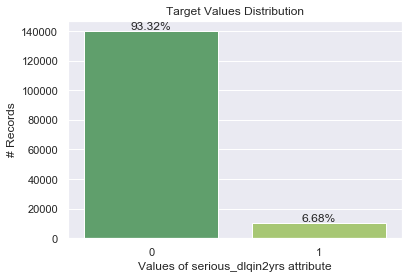

In [17]:
sns.set()
sns.countplot(borrowers.serious_dlqin2yrs, palette='summer').set_title('Target Values Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/target_len)),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Values of serious_dlqin2yrs attribute")
ax.set_ylabel("# Records")
plt.show()

**OPEN POINT: Observation:** <br><br>
Disproportionate percentage of samples for dependent variable. Sampling of training dataset required to remove bias in model development.

**Attributes correlation before delete outliers and null replace**

In [18]:
corr = borrowers[['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse', 'number_of_time60-89_days_past_due_not_worse', 'number_of_times90_days_late', 'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines', 'number_of_dependents']].corr(method = 'pearson')

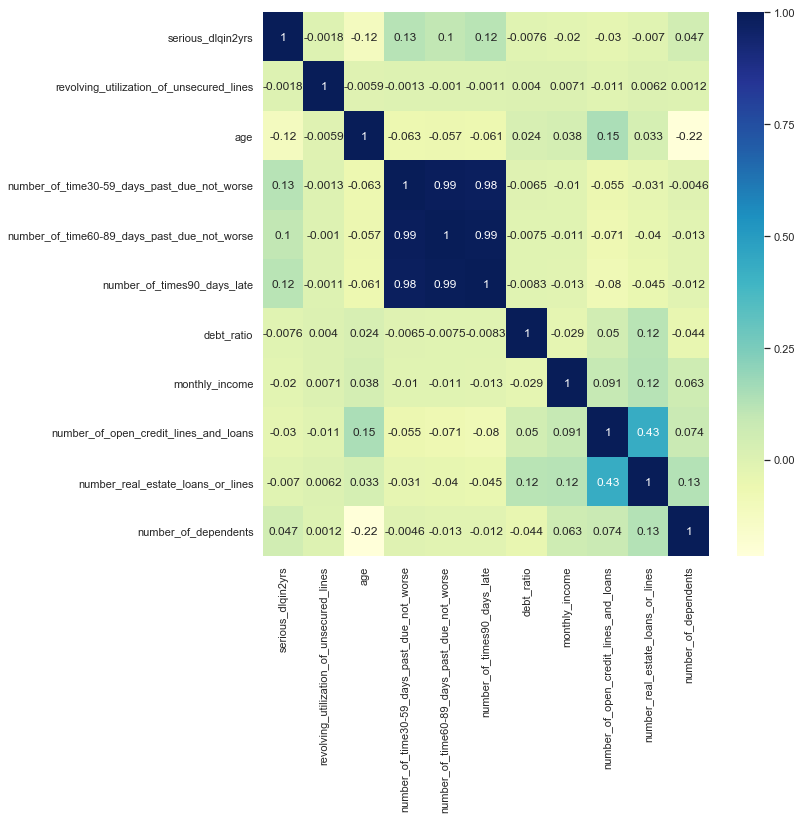

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True);

There is a hight correlation between:
- `number_of_time30-59_days_past_due_not_worse`, `number_of_time60-89_days_past_due_not_worse` and `number_of_times90_days_late` variables.
- `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.

### 2. Data Pre- Processing

#### 2.1 Missing Value Analysis

.isnull (). Returns a new DataFrame in which we will have the value False if it is not missing and True if that value is missing.

In [20]:
borrowers.isnull()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False


In [21]:
borrowers.isna() #another option

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False


We can however combine this function with others in order to obtain the total number of missing data. For example, we can use .isnull().sum(). <br> These numbers return the number of missing values in each column.

In [22]:
print(f"Missing values in each attribute: \n{borrowers.isnull().sum()}")

Missing values in each attribute: 
serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 29731
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64


Graphical representation of the missing values.

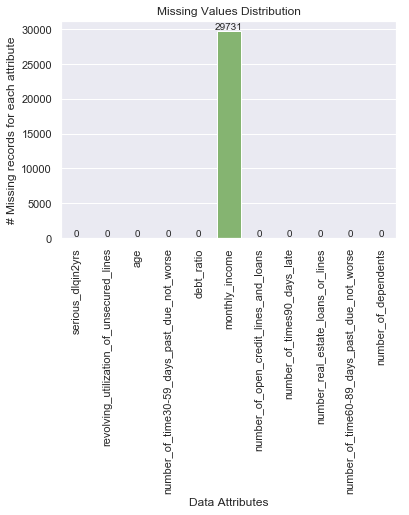

In [23]:
x = borrowers.columns
y = borrowers.isnull().sum()
sns.set()
sns.barplot(x,y, palette='summer').set_title('Missing Values Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=10, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("# Missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

Let's see the lost values in percentages.

In [24]:
print(f"Missing values in each attribute: \n{borrowers.isnull().sum() / row * 100}")

Missing values in each attribute: 
serious_dlqin2yrs                               0.000000
revolving_utilization_of_unsecured_lines        0.000000
age                                             0.000000
number_of_time30-59_days_past_due_not_worse     0.000000
debt_ratio                                      0.000000
monthly_income                                 19.820667
number_of_open_credit_lines_and_loans           0.000000
number_of_times90_days_late                     0.000000
number_real_estate_loans_or_lines               0.000000
number_of_time60-89_days_past_due_not_worse     0.000000
number_of_dependents                            0.000000
dtype: float64


**Observations:**

- `monthly_income` attribute has large number of missing values. We can see that the variable has 29731 null values. And this represent the 20% approx.
- We can eliminate all the rows that have missing values, but this requires an analysis of the amount of missing data and its impact first. <br>
- From our intuition, we know that `monthly_income` is an important predictor for credit scoring, therefore we won’t drop those data-points and find the best strategy to replace NULL values.<br>
- It may be necessary to complete some of them with one of the following methods: mean, median, mode, k-nearest neighbor.
<br><br>
Let's see some statistical details of `monthly_income` column of a DataFrame using the .describe () function.

In [25]:
borrowers['monthly_income'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: monthly_income, dtype: float64

In [26]:
borrowers_median = borrowers['monthly_income'].median()
borrowers_median

5400.0

In [27]:
borrowers_mean = borrowers['monthly_income'].mean()
borrowers_mean

6670.221237392844

**We will test the whole process with a new dataframes with null values replaced by the mean.**

In [28]:
# Replacement of lost values can also be done with 'SimpleImputer' from sklearn library.
# from sklearn.impute import SimpleImputer

In [29]:
borrowers_with_mean = borrowers.fillna((borrowers.median()))

**Verify that there are no more null values.**

In [30]:
borrowers_with_mean.isnull().sum()

serious_dlqin2yrs                              0
revolving_utilization_of_unsecured_lines       0
age                                            0
number_of_time30-59_days_past_due_not_worse    0
debt_ratio                                     0
monthly_income                                 0
number_of_open_credit_lines_and_loans          0
number_of_times90_days_late                    0
number_real_estate_loans_or_lines              0
number_of_time60-89_days_past_due_not_worse    0
number_of_dependents                           0
dtype: int64

The number of records has not been changed.

In [31]:
borrowers_with_mean.shape

(150000, 11)

The original dataframe was not modified.

In [32]:
borrowers.isnull().sum()

serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 29731
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64

**Attributes correlation with null replace before delete outliers**

In [33]:
corr = borrowers_with_mean[['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse', 'number_of_time60-89_days_past_due_not_worse', 'number_of_times90_days_late', 'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines', 'number_of_dependents']].corr(method = 'pearson')

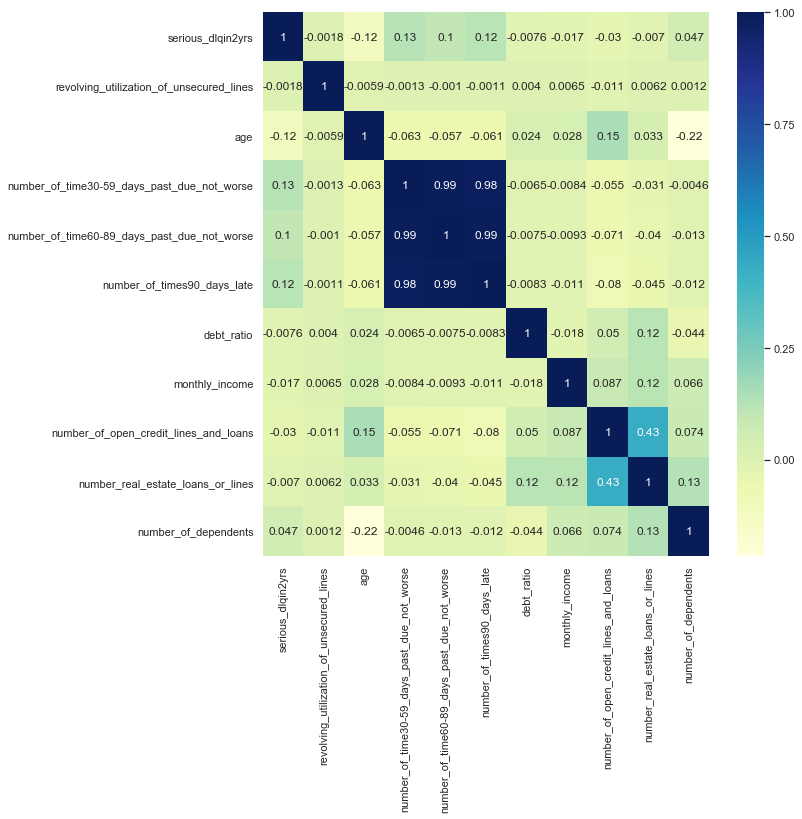

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True);

Correlations are maintained between:
- `number_of_time30-59_days_past_due_not_worse`, `number_of_time60-89_days_past_due_not_worse` and `number_of_times90_days_late` variables.
- `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.

#### 2.2 Outliers Detection

- **`age` attribute**

The `age` variable has a record with value '0', as it is a single record we decided to eliminate it.

In [35]:
borrowers_with_mean.drop(borrowers_with_mean[borrowers_with_mean.age == 0].index, inplace=True)

- **`number_of_time30-59_days_past_due_not_worse` attribute**

The `number_of_time30-59_days_past_due_not_worse` variable has a record with value '96' and '98', we replace them with the median value.

In [36]:
import collections

In [37]:
collections.Counter(borrowers_with_mean['number_of_time30-59_days_past_due_not_worse'])

Counter({2: 4598,
         0: 126018,
         1: 16032,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [38]:
ancillary_functions.outlier_days_past_due_not_worse(borrowers_with_mean, 'number_of_time30-59_days_past_due_not_worse')

In [39]:
collections.Counter(borrowers_with_mean['number_of_time30-59_days_past_due_not_worse'])

Counter({2.0: 4598,
         0.0: 126287,
         1.0: 16032,
         3.0: 1754,
         4.0: 747,
         5.0: 342,
         7.0: 54,
         10.0: 4,
         6.0: 140,
         12.0: 2,
         8.0: 25,
         9.0: 12,
         13.0: 1,
         11.0: 1})

Apply the same function to the other attributes of type "days_past_due_not_worse".

In [40]:
ancillary_functions.outlier_days_past_due_not_worse(borrowers_with_mean, 'number_of_times90_days_late')

In [41]:
ancillary_functions.outlier_days_past_due_not_worse(borrowers_with_mean, 'number_of_time60-89_days_past_due_not_worse')

In [42]:
collections.Counter(borrowers_with_mean['number_of_times90_days_late'])

Counter({0.0: 141930,
         1.0: 5243,
         3.0: 667,
         2.0: 1555,
         5.0: 131,
         4.0: 291,
         10.0: 8,
         9.0: 19,
         6.0: 80,
         7.0: 38,
         8.0: 21,
         15.0: 2,
         11.0: 5,
         13.0: 4,
         14.0: 2,
         17.0: 1,
         12.0: 2})

In [43]:
collections.Counter(borrowers_with_mean['number_of_time60-89_days_past_due_not_worse'])

Counter({0.0: 142664,
         1.0: 5731,
         2.0: 1118,
         5.0: 34,
         3.0: 318,
         4.0: 105,
         6.0: 16,
         7.0: 9,
         8.0: 2,
         11.0: 1,
         9.0: 1})

**Descriptive Statistics After Data Cleaning**

In [44]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000
mean,0.066840,6.048472,52.295555,0.245348,353.007426,6.418458e+03,8.452776,0.090294,1.018233,0.064707,0.737405
std,0.249746,249.756203,14.771298,0.697231,2037.825113,1.289044e+04,5.145964,0.485108,1.129772,0.329790,1.107020
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154176,52.000000,0.000000,0.366503,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559044,63.000000,0.000000,0.868257,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


- After data cleaning total number of cases down to 149999.
- The minimum value of the `age` attribute is no longer `0` but `21`.
- Outliers in variables `revolving_utilization_of_unsecured_lines`, `debt_ratio` and `monthly_income` to be removed through binning.

**Let's see if some of the variables have values that can be described as outliers (attributes with high Standard Deviation).

- **`revolving_utilization_of_unsecured_lines` attribute outliers**

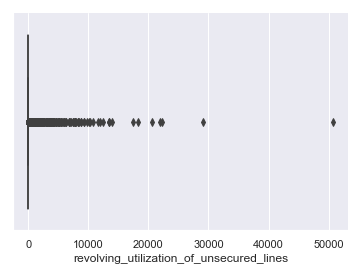

In [45]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- **`debt_ratio` attribute outliers**

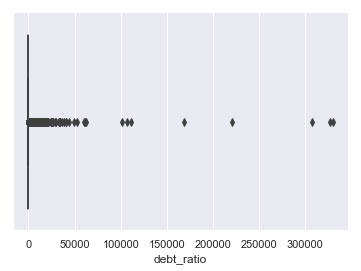

In [46]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- **`monthly_income` attribute outliers**

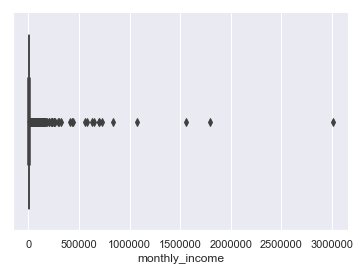

In [47]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- Way to decrease outliers:
    - z-score
        - Consider that any value that is far from the average=0 is an outlier.
        - It depends on the mean and the standard deviation to measure centrality and dispersion, which are very affected by outliers. If the variables do not have a normal distribution, I end up removing many outliers from the dataset.
        - It does not work well in very small datasets.
    - Interquartile range: 
        - It is robust and not as sensitive to outliers.

In [48]:
from scipy import stats

In [49]:
# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = ancillary_functions.detect_outliers(borrowers_with_mean,2,["revolving_utilization_of_unsecured_lines",
                                            "age",
                                            "number_of_time30-59_days_past_due_not_worse",
                                            "debt_ratio",
                                            "monthly_income",
                                            "number_of_open_credit_lines_and_loans",
                                            "number_of_times90_days_late",
                                            "number_real_estate_loans_or_lines",
                                            "number_of_time60-89_days_past_due_not_worse",
                                            "number_of_dependents"])

In [50]:
borrowers_with_mean.loc[Outliers_to_drop]

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
900,0,2.258964,33,2.0,0.032484,2000.0,1,1.0,0,0.0,2.0
919,1,1.362142,73,1.0,274.000000,5400.0,2,3.0,0,1.0,0.0
1958,0,1.634551,28,0.0,151.000000,5400.0,1,3.0,0,2.0,0.0
4793,0,3746.000000,52,2.0,0.481353,2600.0,5,0.0,1,0.0,3.0
4852,0,1.566866,46,2.0,0.104983,6000.0,3,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142226,1,0.859714,55,0.0,0.599348,11046.0,18,7.0,6,6.0,1.0
142830,0,0.889452,47,0.0,0.411026,8833.0,13,3.0,1,1.0,3.0
143782,1,1.000000,38,0.0,0.250573,5666.0,4,2.0,1,1.0,3.0
146360,0,0.921219,45,0.0,0.092564,3845.0,3,1.0,0,1.0,3.0


We detected 4938 outliers in the dataset, which represents 3.29% of our training data. We will drop these outliers.

In [51]:
borrowers_with_mean.shape

(149999, 11)

In [52]:
borrowers_with_mean = borrowers_with_mean.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [53]:
borrowers_with_mean.shape

(145061, 11)

In [54]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,145061.000000,145061.000000,145061.000000,145061.000000,145061.000000,1.450610e+05,145061.000000,145061.000000,145061.000000,145061.000000,145061.000000
mean,0.055466,5.547413,52.425262,0.197158,338.511789,6.347142e+03,8.401583,0.055377,0.999903,0.036405,0.711321
std,0.228889,242.079604,14.844237,0.603047,2032.229250,1.263967e+04,5.036792,0.363150,1.042804,0.230585,1.076328
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028597,41.000000,0.000000,0.171971,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.144521,52.000000,0.000000,0.361836,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.527667,63.000000,0.000000,0.826113,7.375000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,57.000000,17.000000,25.000000,11.000000,10.000000


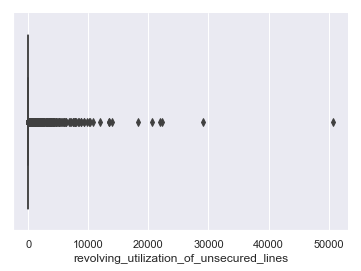

In [55]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

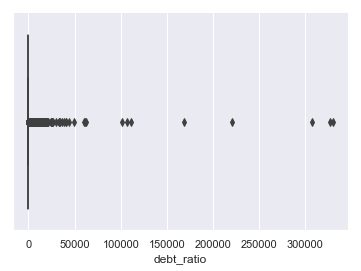

In [56]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

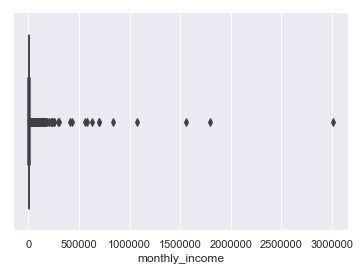

In [57]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

**Although the standard deviation of the three variables that had the highest standard deviation decreased, they still have outliers.<br>
Try with z-score function.**

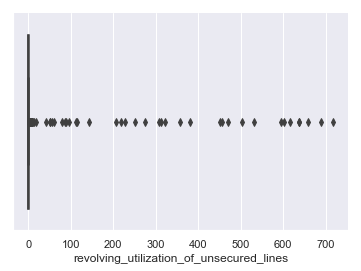

In [58]:
borrowers_with_mean = ancillary_functions.my_zscore(borrowers_with_mean, 'revolving_utilization_of_unsecured_lines', 3)
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers recién luego de ejecutada varias veces la función

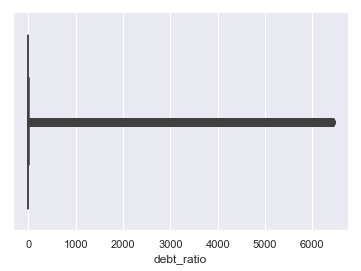

In [59]:
borrowers_with_mean = ancillary_functions.my_zscore(borrowers_with_mean,'debt_ratio', 3)
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers luego de ejecutada varias veces la función

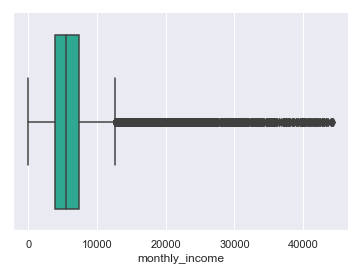

In [60]:
borrowers_with_mean = ancillary_functions.my_zscore(borrowers_with_mean,'monthly_income', 3)
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers luego de ejecutada varias veces la función

In [61]:
borrowers_with_mean.shape

(144002, 11)

In [62]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000
mean,0.055513,0.388718,52.417265,0.197386,290.669356,6114.625859,8.384002,0.055721,0.989639,0.036583,0.711421
std,0.228980,6.149426,14.864221,0.603216,861.411994,3958.788129,5.027205,0.364356,1.026522,0.231229,1.076267
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028517,41.000000,0.000000,0.172178,3885.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.143765,52.000000,0.000000,0.361035,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.525590,63.000000,0.000000,0.811547,7350.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,717.000000,109.000000,13.000000,6432.000000,44308.000000,57.000000,17.000000,25.000000,11.000000,10.000000


In [63]:
target_len = len(borrowers_with_mean['serious_dlqin2yrs'])
percentage_var = (borrowers_with_mean['serious_dlqin2yrs'].value_counts()/target_len)*100
percentage_var

0    94.448688
1     5.551312
Name: serious_dlqin2yrs, dtype: float64

**Try with other way** 

**`debt_ratio` attribute outliers delete.**

In [64]:
minUpperBound = min([val for (val, out) in zip(borrowers_with_mean.debt_ratio, ancillary_functions.mad_based_outlier(borrowers_with_mean.debt_ratio)) if out == True])

In [65]:
minUpperBound

1.604697651

In [66]:
newDebtRatio = []
for val in borrowers_with_mean.debt_ratio:
    if val >= minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

borrowers_with_mean.debt_ratio = newDebtRatio

In [67]:
borrowers_with_mean.shape

(144002, 11)

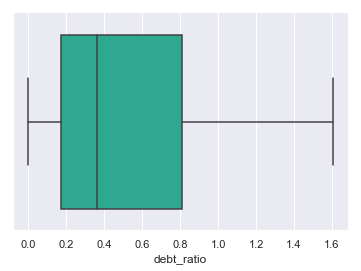

In [68]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers luego de ejecutada varias veces la función

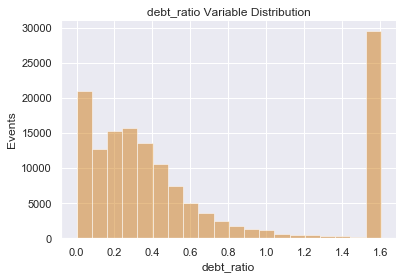

In [69]:
ancillary_functions.my_histogram(borrowers_with_mean['debt_ratio'], color="#cf7c17")

**Obervation:**
<br><br>
It can be observed that the variable `debt_ratio` no longer has outliers.
<br><br>

**`monthly_income` attribute outliers delete.**

Discretize variable into equal-sized buckets based on rank or based on sample quantiles.

In [70]:
borrowers_with_mean['monthly_income_bin'] = pd.qcut(borrowers_with_mean.monthly_income.values, 5).codes

In [71]:
borrowers_with_mean.shape

(144002, 12)

In [72]:
collections.Counter(borrowers_with_mean['monthly_income_bin'])

Counter({4: 28640, 0: 28802, 1: 28801, 2: 29079, 3: 28680})

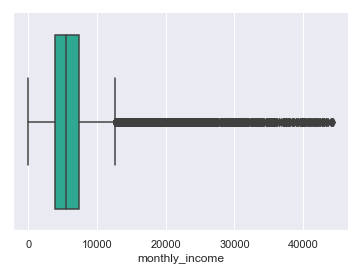

In [73]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

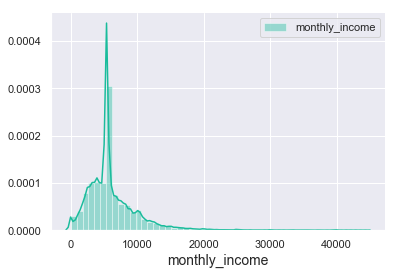

In [74]:
sns.distplot(borrowers_with_mean['monthly_income'], color='#1ABC9C', label='monthly_income')
plt.xlabel('monthly_income', size=14)
plt.legend()
sns.despine()

In [75]:
minUpperBound = min([val for (val, out) in zip(borrowers_with_mean.monthly_income, ancillary_functions.mad_based_outlier(borrowers_with_mean.monthly_income)) if out == True])

In [76]:
minUpperBound

14145.0

In [77]:
new_monthly_income = []
for val in borrowers_with_mean.monthly_income:
    if val >= minUpperBound:
        new_monthly_income.append(minUpperBound)
    else:
        new_monthly_income.append(val)

In [78]:
borrowers_with_mean.monthly_income = new_monthly_income

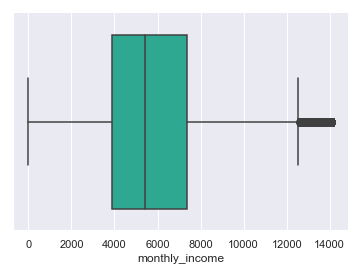

In [79]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

In [80]:
borrowers_with_mean['monthly_income'].describe()

count    144002.000000
mean       5916.060194
std        3181.598307
min           0.000000
25%        3885.000000
50%        5400.000000
75%        7350.000000
max       14145.000000
Name: monthly_income, dtype: float64

**Obervation:**
<br><br>
It can be observed that the variable `monthly_income` considerably reduced the number of outliers.
<br><br>

**`revolving_utilization_of_unsecured_lines` attribute outliers delete.**

In [81]:
revNew = []
borrowers_with_mean['revolving_utilization_of_unsecured_lines']
for val in borrowers_with_mean['revolving_utilization_of_unsecured_lines']:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
borrowers_with_mean['revolving_utilization_of_unsecured_lines'] = revNew

In [82]:
borrowers_with_mean.shape

(144002, 12)

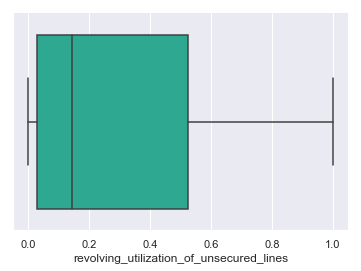

In [83]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

**Obervation:**
<br><br>
It can be observed that the variable `revolving_utilization_of_unsecured_lines` no longer has outliers.
<br><br>

In [84]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,monthly_income_bin
count,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.00000
mean,0.055513,0.306822,52.417265,0.197386,0.587765,5916.060194,8.384002,0.055721,0.989639,0.036583,0.711421,1.99691
std,0.228980,0.342485,14.864221,0.603216,0.568135,3181.598307,5.027205,0.364356,1.026522,0.231229,1.076267,1.41236
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.028517,41.000000,0.000000,0.172178,3885.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,0.000000,0.143765,52.000000,0.000000,0.361035,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000,2.00000
75%,0.000000,0.525590,63.000000,0.000000,0.811547,7350.000000,11.000000,0.000000,2.000000,0.000000,1.000000,3.00000
max,1.000000,0.999990,109.000000,13.000000,1.604698,14145.000000,57.000000,17.000000,25.000000,11.000000,10.000000,4.00000


**Variable Binning**

- Age: Age Binning containing bins for age group

| Age Group | Bin | 
| --- | --- |
| 21-30 | 1 |
| 31-40 | 2 |
| 41-50 | 3 |
| 51-60 | 4 |
| > 60 | 5 |


- DebtRatio & RevolvingUtilizationOfUnsecuredLines: Created variables DebtRatio_Binning and RevolvingUtilizationOfUnsecuredLines_Binning with following cut off values:

| Group | Bin | Remark |
| --- | --- |  --- |
| <=0.25  | 1 |  Good |
| 0.25 - 0.50  | 2 |  Low Risk |
| > 0.50 | 3 |  High Risk |



### 3. Exploratory Analysis

### Target (serious_dlqin2yrs) over different categories

**Attributes Correlations after delete outliers**

In [85]:
corr = borrowers_with_mean[['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse', 'number_of_time60-89_days_past_due_not_worse', 'number_of_times90_days_late', 'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines', 'number_of_dependents']].corr(method = 'pearson')

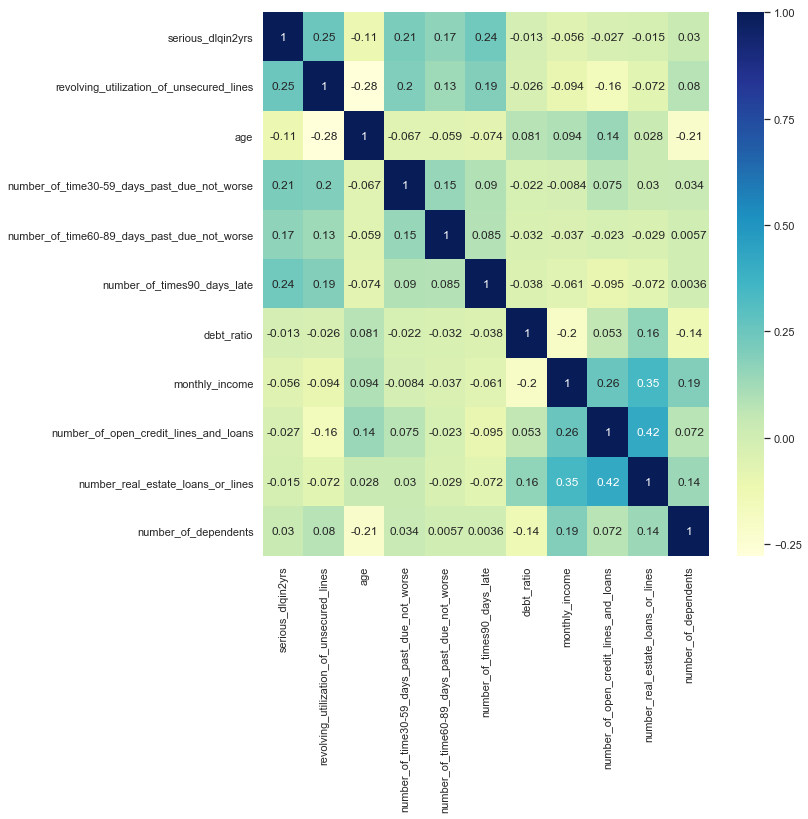

In [86]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True);

Correlations losts:
- The correlation between `number_of_time30-59_days_past_due_not_worse`, `number_of_time60-89_days_past_due_not_worse` and `number_of_times90_days_late` was lost. **OPEN POINT:** Verify why the correlation between these variables is lost after eliminating the outliers.

Existing correlations:
- `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.
- `monthly_income` with `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.
- Then there is a small correlation between `revolving_utilization_of_unsecured_lines` and `serious_dlqin2yrs` variables.
- There is a small correlation between `number_of_times90_days_late` and `serious_dlqin2yrs` variables.

**Age, Monthly and Target relation**

In [87]:
subset = borrowers_with_mean[['serious_dlqin2yrs', 'age', 'monthly_income']]
subset.groupby("serious_dlqin2yrs")
subset.groupby("serious_dlqin2yrs").mean()

,age,monthly_income
serious_dlqin2yrs,,
0,52.810386,5959.203878
1,45.728797,5182.023893


- The average age of non-risk borrowers (52) is not much higher than the average age of risk borrowers (45).
- There is also no significant difference between the average monthly salary of risky and non-risk providers.

In [88]:
subset.groupby("serious_dlqin2yrs").agg([np.min, np.mean, np.median, np.max])

age                        monthly_income               \
                  amin       mean median amax           amin         mean   
serious_dlqin2yrs                                                           
0                   21  52.810386     53  109            0.0  5959.203878   
1                   21  45.728797     45  101            0.0  5182.023893   

                                    
                   median     amax  
serious_dlqin2yrs                   
0                  5400.0  14145.0  
1                  5000.0  14145.0

**a) Age**

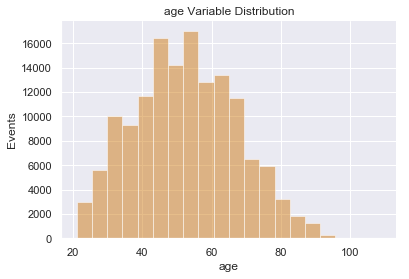

In [89]:
ancillary_functions.my_histogram(borrowers_with_mean['age'], color="#cf7c17")

In [90]:
borrowers_with_mean[borrowers_with_mean['age'] >= 50].shape

(80787, 12)

In [91]:
borrowers_with_mean[borrowers_with_mean['age'] < 50].shape

(63215, 12)

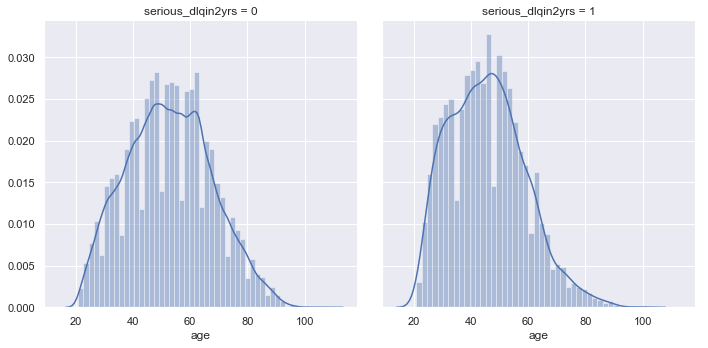

In [92]:
# Explore Age vs Target
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
plt.gcf().set_size_inches(10, 5)
g = g.map(sns.distplot, "age")

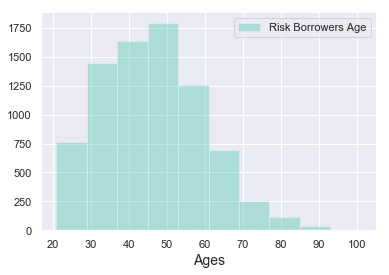

In [93]:
risk_borrowers=borrowers_with_mean[(borrowers_with_mean['serious_dlqin2yrs'] == 1)]
plt.hist(risk_borrowers['age'], color='#1ABC9C', label='Risk Borrowers Age', alpha=0.3)
plt.xlabel('Ages', size=14)
plt.legend()
sns.despine()

In [94]:
borrowers_with_mean['age_bin'] = pd.qcut(borrowers_with_mean.age.values, 5).codes

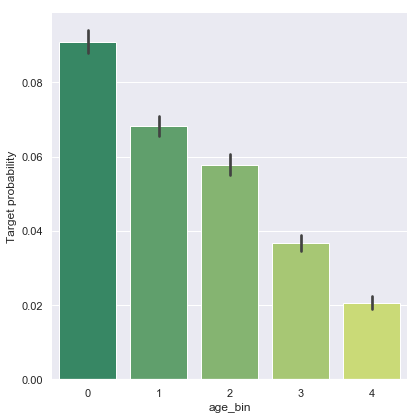

In [95]:
# Explore age feature vs Target
g  = sns.factorplot(x="age_bin",y="serious_dlqin2yrs",data=borrowers_with_mean,kind="bar", size = 6 , 
palette = "summer")
g.despine(left=True)
g = g.set_ylabels("Target probability")

**Observations:**
- Maximum borrowers from age group 50+
- Borrowers risk is highest for age group of 40-50 and Lowest in 20-30 age group.
- We can see that age has an inverse relationship to default risk.

**b) Number of Dependents**

In [96]:
borrowers_with_mean['number_of_dependents'].describe()

count    144002.000000
mean          0.711421
std           1.076267
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: number_of_dependents, dtype: float64

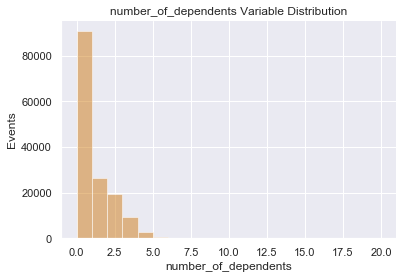

In [97]:
ancillary_functions.my_histogram(borrowers['number_of_dependents'], color="#cf7c17")

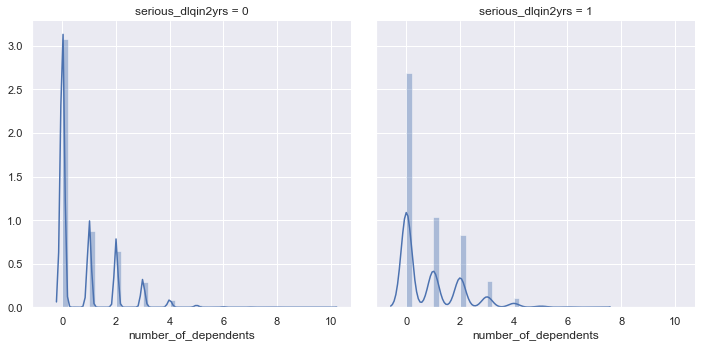

In [98]:
# Explore number_of_dependents vs Target
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
plt.gcf().set_size_inches(10, 5)
g = g.map(sns.distplot, "number_of_dependents")

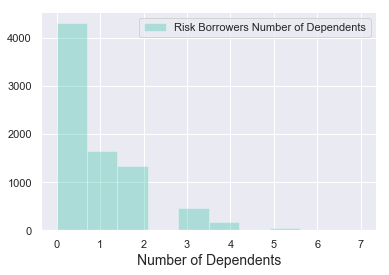

In [99]:
risk_borrowers=borrowers_with_mean[(borrowers_with_mean['serious_dlqin2yrs'] == 1)]
plt.hist(risk_borrowers['number_of_dependents'], color='#1ABC9C', label='Risk Borrowers Number of Dependents', alpha=0.3)
#plt.hist(borrowers_with_mean['serious_dlqin2yrs'], color='#EB984E', label='Todos', alpha=0.3)
plt.xlabel('Number of Dependents', size=14)
plt.legend()
sns.despine()

In [100]:
borrowers_with_mean['number_of_dependents_bin'] = pd.qcut(borrowers_with_mean.monthly_income.values, 5).codes

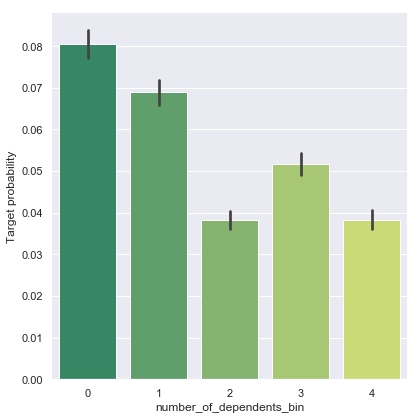

In [101]:
# Explore Monthly number_of_dependents_bin feature vs Target
g  = sns.factorplot(x="number_of_dependents_bin",y="serious_dlqin2yrs",data=borrowers_with_mean,kind="bar", size = 6 , 
palette = "summer")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Dependents greater than '3'.

In [102]:
borrowers_with_mean[borrowers_with_mean['number_of_dependents'] >= 3].shape[0] / borrowers_with_mean['number_of_dependents'].shape[0] * 100

8.04086054360356

**Observations:**
- Around 60% data have number of dependents as 0; Delinquency count and percentage also highest for this group.
- Total percentage share of data with dependents greater than 3 is only around 8%.

**c) Debt Ratio**

In [103]:
borrowers_with_mean.debt_ratio.describe()

count    144002.000000
mean          0.587765
std           0.568135
min           0.000000
25%           0.172178
50%           0.361035
75%           0.811547
max           1.604698
Name: debt_ratio, dtype: float64

In [104]:
bins_debt_ratio = [-1, 0.25, 0.5, 1.7]
debt_ratio_categories = pd.cut(borrowers_with_mean['debt_ratio'], bins=bins_debt_ratio, 
                          labels=['Good', 'Low Risk', 'High Risk'])

In [105]:
borrowers_with_mean['debt_ratio_bin']= debt_ratio_categories

In [106]:
pd.crosstab(borrowers_with_mean['debt_ratio_bin'], borrowers_with_mean['serious_dlqin2yrs'])

serious_dlqin2yrs,0,1
debt_ratio_bin,,
Good,48219,2694
Low Risk,38083,2112
High Risk,49706,3188


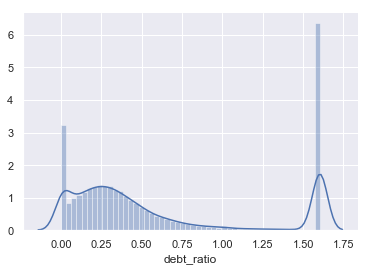

In [107]:
sns.distplot(borrowers_with_mean['debt_ratio'])
sns.despine()

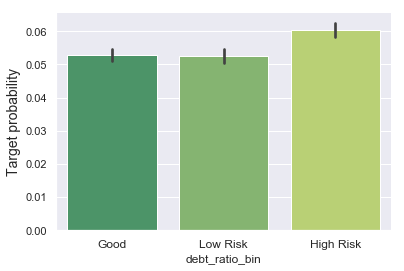

In [108]:
sns.barplot(x='debt_ratio_bin', y='serious_dlqin2yrs', data=borrowers_with_mean, palette='summer')
plt.xticks(size=12)
plt.xlabel('debt_ratio_bin', size=12)
plt.ylabel('Target probability', size=14)
sns.despine()

**Observations:**
- Around 40% (3188) of borrowers risk from group with Debt Ratio > 0.5 (High Risk).

**d) Revolving Utilization of Unsecured Lines**

In [109]:
borrowers_with_mean.revolving_utilization_of_unsecured_lines.describe()

count    144002.000000
mean          0.306822
std           0.342485
min           0.000000
25%           0.028517
50%           0.143765
75%           0.525590
max           0.999990
Name: revolving_utilization_of_unsecured_lines, dtype: float64

In [110]:
bins_unsecured_lines = [-1, 0.25, 0.5, 0.999990]
unsecured_lines_categories = pd.cut(borrowers_with_mean['revolving_utilization_of_unsecured_lines'], bins=bins_unsecured_lines, 
                          labels=['Good', 'Low Risk', 'High Risk'])

In [111]:
borrowers_with_mean['revolving_utilization_of_unsecured_lines_bin']= unsecured_lines_categories

In [112]:
#RevolvingUtilizationOfUnsecuredLines (Binned) * SeriousDlqin2yrs Crosstabulation
pd.crosstab(borrowers_with_mean['revolving_utilization_of_unsecured_lines_bin'], borrowers_with_mean['serious_dlqin2yrs'])
#.apply(lambda r: r/len(borrowers_with_mean)*100, axis=1)

serious_dlqin2yrs,0,1
revolving_utilization_of_unsecured_lines_bin,,
Good,84421,1651
Low Risk,19365,960
High Risk,32222,5383


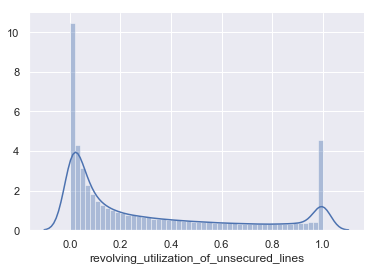

In [113]:
sns.distplot(borrowers_with_mean['revolving_utilization_of_unsecured_lines'])
sns.despine()

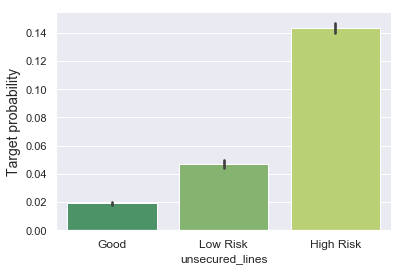

In [114]:
sns.barplot(x='revolving_utilization_of_unsecured_lines_bin', y='serious_dlqin2yrs', data=borrowers_with_mean, palette='summer')
plt.xticks(size=12)
plt.xlabel('unsecured_lines', size=12)
plt.ylabel('Target probability', size=14)
sns.despine()

**Observations:**
- We can that there is an almost exponential relationship between this variable and our target.
- Around 69% (3.738707) of Delinquency from group with RevolvingUtilizationOfCreditLines > 0.5 (High Risk)

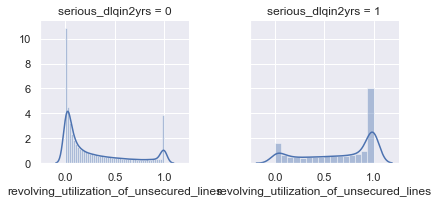

In [115]:
# Explore Age vs Survived
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
g = g.map(sns.distplot, "revolving_utilization_of_unsecured_lines")

**e) Monthly Income**

In [116]:
borrowers_with_mean['monthly_income'].describe() # Algo no está bien si quedó con max 4 como sueldo.

count    144002.000000
mean       5916.060194
std        3181.598307
min           0.000000
25%        3885.000000
50%        5400.000000
75%        7350.000000
max       14145.000000
Name: monthly_income, dtype: float64

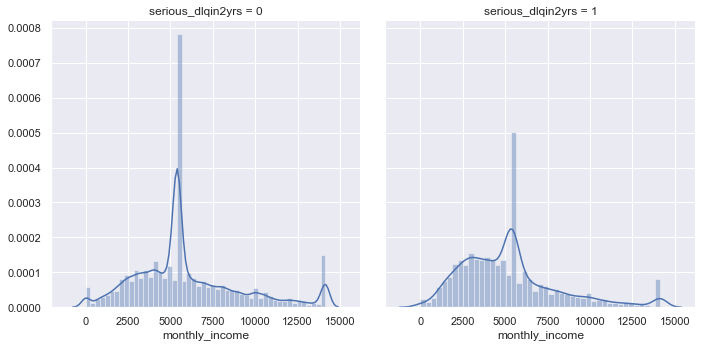

In [117]:
# Explore monthly_income vs Target
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
plt.gcf().set_size_inches(10, 5)
g = g.map(sns.distplot, "monthly_income")

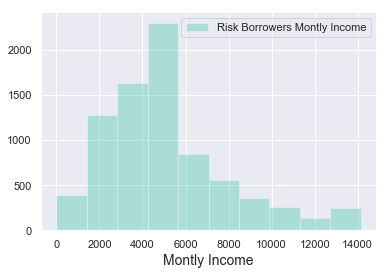

In [118]:
risk_borrowers=borrowers_with_mean[(borrowers_with_mean['serious_dlqin2yrs'] == 1)]
plt.hist(risk_borrowers['monthly_income'], color='#1ABC9C', label='Risk Borrowers Montly Income', alpha=0.3)
plt.xlabel('Montly Income', size=14)
plt.legend()
sns.despine()

In [119]:
borrowers_with_mean['monthly_income_bin'] = pd.qcut(borrowers_with_mean.monthly_income.values, 5).codes

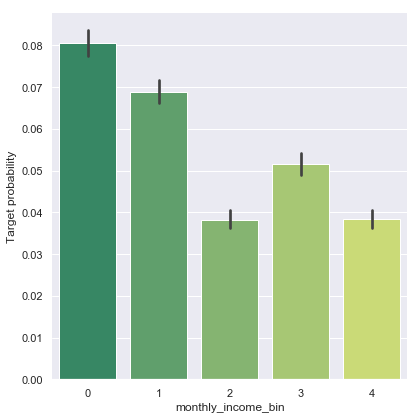

In [120]:
# Explore Monthly Income feature vs Target
g  = sns.factorplot(x="monthly_income_bin",y="serious_dlqin2yrs",data=borrowers_with_mean,kind="bar", size = 6 , 
palette = "summer")
g.despine(left=True)
g = g.set_ylabels("Target probability")

**Observations:**
- More than 50% of defaulters are accounted by lower 40% of the income range (Bin 0 and 1).
- Other 3 groups have more or less same percentage of defaulters.

In [121]:
#Monthly Income vs. Other Financial Variables # GRAFICAR

All parameters below have similar pattern: low income range attributing to high values of debt indicators.
    
i) RevolvingUtilizationOfUnecuredLines, <br>
ii) DebtRatio, <br>
iii) NumberOfTime30-59DaysPastDueNotWorse,  <br>
iv) NumberOfTimes90DaysLate,  <br>
v) NumberOfTime60-089DaysPastDueNotWorse,  <br>
vi) NumberOfOpenCreditLinesAndLoans,  <br>
vii) NumberOfRealEstateLoansOrLines

#### 2.2 Attributes Correlations

In [122]:
corr = borrowers_with_mean[['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse', 'number_of_time60-89_days_past_due_not_worse', 'number_of_times90_days_late', 'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines', 'number_of_dependents', 'monthly_income_bin', 'age_bin', 'debt_ratio_bin', 'revolving_utilization_of_unsecured_lines_bin', 'number_of_dependents_bin']].corr(method = 'pearson')

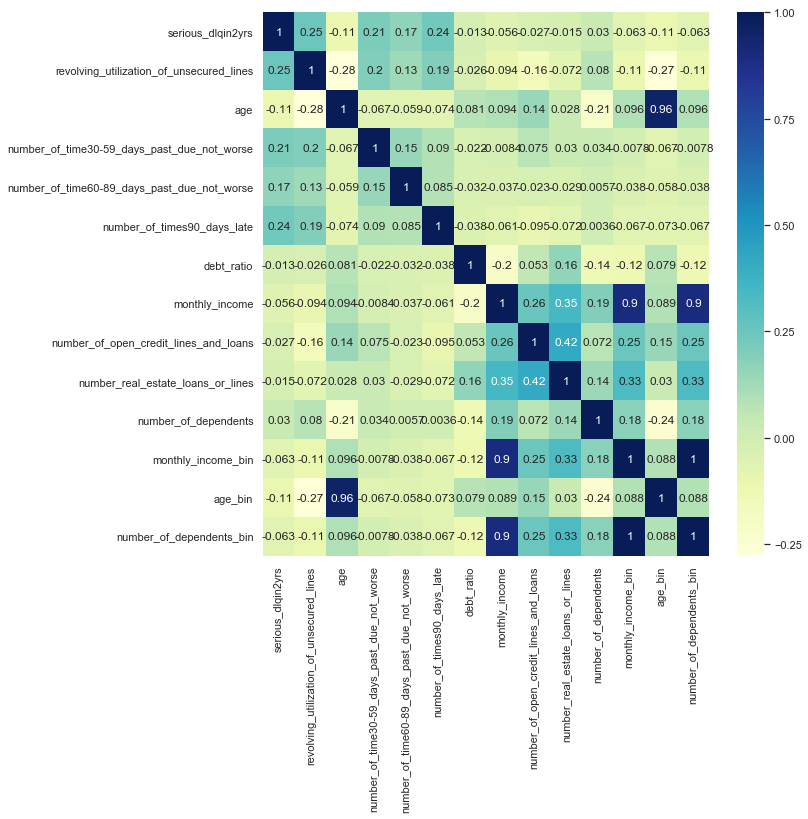

In [123]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True);

Correlations are maintained between:
- `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.
- `monthly_income` with `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.
- Then there is a small correlation between `revolving_utilization_of_unsecured_lines` and `serious_dlqin2yrs` variables.
- There is a small correlation between `number_of_times90_days_late` and `serious_dlqin2yrs` variables.

**Save the modified dataframe for the following steps (building a model).**

In [124]:
borrowers_with_mean.to_csv('credit-data-clean.csv')